In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
df['loan_status'].unique()

array([1, 0])

<Axes: >

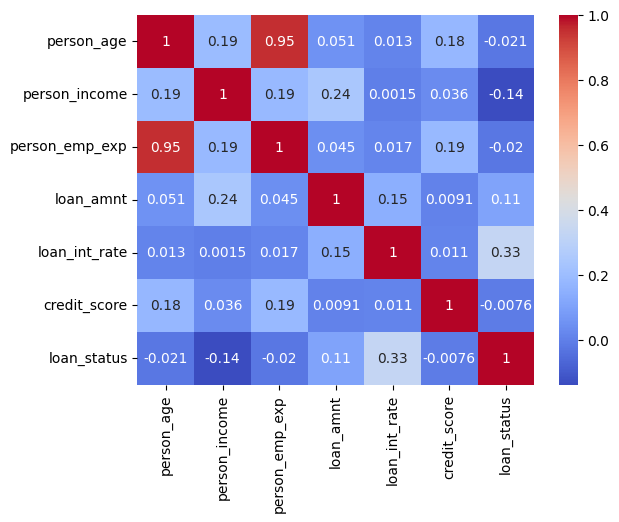

In [ ]:
num_col = ['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','cb_person_cred_hist_length','credit_score','loan_status']
cat_col = ['person_gender','person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file']
sns.heatmap(df[num_col].corr(numeric_only=True),annot=True,cmap='coolwarm')

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for c in cat_col:
    df[c] = le.fit_transform(df[c])
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col = df.columns.drop('loan_status')
df[col] = scaler.fit_transform(df[col])
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,-0.953538,-1.110069,1.525264,-0.104090,-0.892284,0.904822,4.024953,0.852919,1.683039,4.016394,-0.739109,-1.419814,-1.016040,1
1,-1.118963,-1.110069,0.849192,-0.846005,-0.892284,0.210609,-1.359209,-0.882904,0.044782,-0.684829,-0.996863,-2.549975,0.984213,0
2,-0.457264,-1.110069,0.849192,-0.844065,-0.397517,-1.177817,-0.646600,0.274312,0.625557,3.443074,-0.739109,0.047412,-1.016040,1
3,-0.788113,-1.110069,-0.502953,-0.007039,-0.892284,0.904822,4.024953,0.274312,1.417829,3.443074,-0.996863,0.840507,-1.016040,1
4,-0.622689,0.900845,1.525264,-0.176371,-0.727362,0.904822,4.024953,0.274312,1.095549,4.475050,-0.481354,-0.924130,-1.016040,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-0.126414,0.900845,-1.179025,-0.402231,0.097249,0.904822,0.857799,0.274312,1.562184,1.952442,-0.739109,0.245686,-1.016040,1
44996,1.527834,-1.110069,-1.179025,-0.180537,1.911393,0.904822,-0.092348,-0.304296,1.028407,0.003155,1.322928,-0.230171,-1.016040,1
44997,0.866135,0.900845,-1.179025,-0.290681,0.262171,0.904822,-1.078758,-1.461512,-0.331212,-1.028821,1.065174,0.701716,-1.016040,1
44998,0.204436,0.900845,-0.502953,-0.586348,-0.232595,0.904822,0.382726,-0.882904,0.746412,2.525762,0.034155,-0.567237,-1.016040,1


In [9]:
from sklearn.model_selection import train_test_split

y = df['loan_status']
X = df[col].drop(cat_col,axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 42).fit(X_train,y_train)
pred = model.predict(X_test)
print(pred)
pred_prob = model.predict_proba(X_test)
print(pred_prob)
print(model.score(X_train,y_train))


[0 0 0 ... 0 0 1]
[[0.9834654  0.0165346 ]
 [0.77982747 0.22017253]
 [0.53900648 0.46099352]
 ...
 [0.79340535 0.20659465]
 [0.58620831 0.41379169]
 [0.49663624 0.50336376]]
0.8295


In [11]:
import joblib
joblib.dump(model,'LoanValidater.pkl')

['LoanValidater.pkl']